<font size = 5> **Small-sample characterization of stochastic approximation staircases in forced-choice adaptive threshold estimation** </font>

link - https://link.springer.com/article/10.3758/BF03193747

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Stochastic Approximation Staircases**

The SA algorithm accomplishes the following stepping rule to predict the stimulus intensity. 

$$ x(n+1) = x(n) - \frac{C}{n} [z(n) - \Phi]   \rightarrow eq 1$$ 

n - number of trials that have already occured

x(n+1), x(n) - Intensities of the next and previous trials, respectively.

$\Phi$ - Target Probability

C - Initial step size 

z(n) - Binary quantity that depends on the response of the nth trial (z = 1 incase of success and 0 for failure) 

Then according to the equation if a <u>correct</u> response is given the trial will be decremented by $\delta = \frac{C(1 - \Phi)}{n}$. If an <u>incorrect</u> response is given, the next trial will be incremented by $\delta = \frac{C\Phi}{n}$

__________________________________________________________________________________________________________________

Kesten (1958) proposed a modified version for the SA method *(accelerated SA)*

$$x(n+1) = x(n) - \frac{C[z(n) - \Phi]}{n_{shift} + 1} \rightarrow eq2$$


$n_{shift}$ - number of trials at which the response changes from correct to incorrect or vise versa


The subject responses in this paper are simulated using a weibull function. 

$$\Psi(x) = 0.98 - 0.48 . e^{-0.736 . {(\frac{x}{\mu})}^{\frac{2.265}{\sigma}}} $$

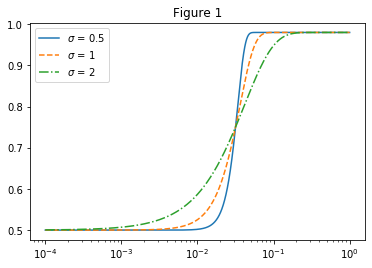

In [2]:
#parameters and variables
x = np.linspace(0.0001, 1, 10000)
mu = 10**(-1.5)

#weibull psychometric function
def weibull(sigma, x):
    expo = -0.736*(x/mu)**(2.265/sigma)
    wb = 0.98 - 0.48 * np.exp(expo)
    return wb

plt.plot(x, weibull(0.5, x), label = '$\sigma$ = 0.5')
plt.plot(x, weibull(1, x), label = '$\sigma$ = 1', linestyle = '--')
plt.plot(x, weibull(2, x), label = '$\sigma$ = 2', linestyle = '-.')
plt.xscale('log')
plt.legend()
plt.title('Figure 1')
plt.show()

In [3]:
#simulate the trials for SA
n_trials = np.arange(1,50)

#initial values and other parameter values
x0 = -1/10
phi = 0.75
C = 1

X = []

for n in n_trials:
    
    u = np.random.uniform()
    
    if u > weibull(10, 10**(x0)):
        z = 0
    else:
        z = 1
    
    #stochastic approximation 
    x = x0 - (C/n)*(z - phi)
    
    X.append(x0)    
    x0 = x    

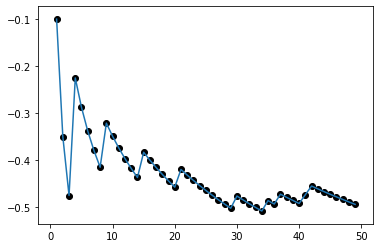

In [4]:
plt.plot(n_trials, X)
plt.scatter(n_trials, X, color = 'k')
plt.show()

In [5]:
def sym_psycho(x, prob, n_trials):
    #list to append respond rate
    response_rate = []
    
    for i in range(len(x)):
        #append responses at each stimuli
        responses = []
        
        for n in range(n_trials):
            
            response = np.random.choice([0, 1], p = [1 - prob[i], prob[i]])
            responses.append(response)
        
        response_rate.append(np.sum(responses)/n_trials)
        
    
    return response_rate  

#x v
def nloglik(paras, I, C):

    #calculate the Probability of each point using mean and sigma
    P = 1/2 + (1/2) * stats.norm.cdf(I, paras[0], paras[1])
    
    #nll
    nll = -np.sum(C * np.log(P) + (1 - C) * np.log(1 - P))
    
        
    return nll

